In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [81]:
path = '..//data//ex1data1.txt'
data = pd.read_csv(path, header=None, names = ['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [82]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


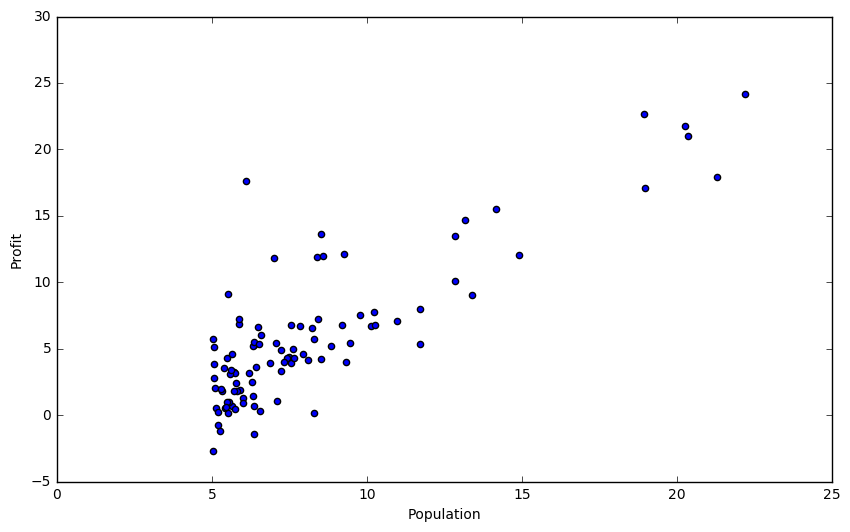

In [83]:
data.plot(x = 'Population', y = 'Profit', kind='scatter', figsize=(10,6))

In [120]:
def cost(X, y, theta):
    sq_error = np.power((X * theta.T) - y, 2)
    return np.sum(sq_error)/ (2 * len(X))

In [85]:
data.insert(0,'ones', 1)

In [86]:
data.head()

,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [87]:
cols = data.shape[1]
X = data.iloc[:,0:cols -1]
y = data.iloc[:,cols-1:cols]

In [88]:
X.head()

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [89]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [90]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix([[0,0]])
theta

matrix([[0, 0]])

In [91]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [92]:
cost(X, y, theta)

32.072733877455676

In [116]:
def grad_desc(X, y, theta, alpha = 0.01, iters = 1500):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])  # Ravel flattens array
    cost = np.zeros(iters)
    
    for i in range(iters):
        errors = ((X * theta.T) - y)
        for j in range(parameters):
            inner = np.multiply(errors, X[:, j])
            temp[0, j] = theta[0,j] - ((alpha/len(X)) * np.sum(inner))
            
        theta = temp  # Simultaneous update
        cost[i] = cost(X, y, theta)
    
    return theta, cost

In [117]:
alpha = 0.01
iters = 1500

In [121]:
params, cost = grad_desc(X, y, theta, alpha, iters)
params

TypeError: 'numpy.ndarray' object is not callable

In [119]:
cost(X, y, params)

4.4833882565877259